5


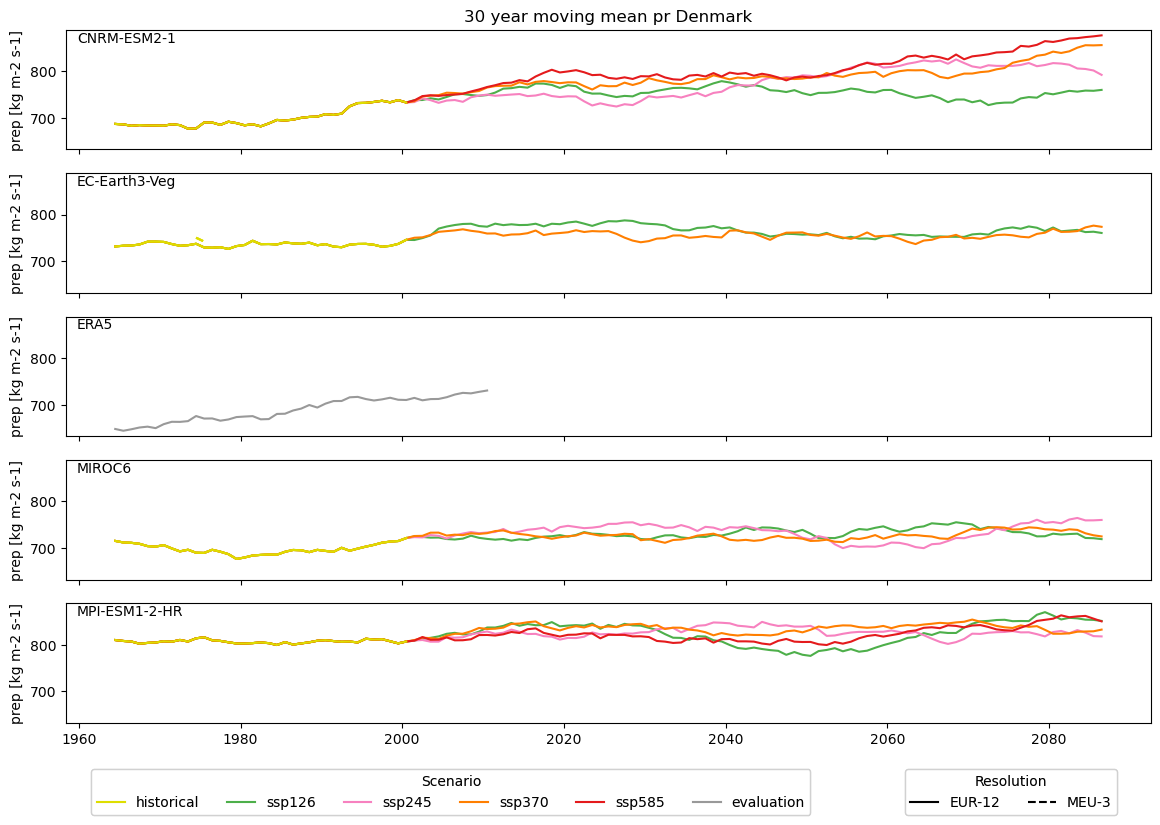

In [ ]:
# Try to plot with moving mean

import json

import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


def load_json_file(json_file: str) -> dict:
    with open(json_file, "r", encoding="utf-8") as file:
        return json.load(file)


def scenario_color(scenario):
    match scenario:
        case "historical":
            return "#dede00"
        case "ssp126":
            return "#4daf4a"
        case "ssp245":
            return "#f781bf"
        case "ssp370":
            return "#ff7f00"
        case "ssp585":
            return "#e41a1c"
        case "evaluation":
            return "#999999"
        case _:
            raise SystemExit("Unknown scenario")


def resolution_linestyle(resolution):
    match resolution:
        case "EUR-12":
            return "solid"
        case "MEU-3":
            return "dashed"
        case _:
            raise SystemExit("Unknown resolution")


sfc_wind_info = load_json_file(
    "/work/bb1203/g260190_heinrich/UDAG/Scripts/pr_info.json"
)["yearly"]

fig, axes = plt.subplots(
    len(sfc_wind_info), 1, figsize=(14, 9), sharex=True, sharey=True
)

for gcm_index, gcm in enumerate(sfc_wind_info):
    axes[gcm_index].text(
        0.01, 0.99, gcm, ha="left", va="top", transform=axes[gcm_index].transAxes
    )
    axes[gcm_index].set_ylabel("precipitation [kg m^-2]")
    for scenario in sfc_wind_info[gcm]:
        for resolution in sfc_wind_info[gcm][scenario]:
            if scenario == "historical" or scenario == "evaluation":
                continue
            else:
                # combine hist and
                with (
                    xr.open_dataset(sfc_wind_info[gcm][scenario][resolution]) as da,
                    xr.open_dataset(sfc_wind_info[gcm]["historical"][resolution]) as db,
                ):
                    df = xr.concat([db, da], dim="time")
                    dx = df["pr"].rolling(time=29, center=True).mean()
                    axes[gcm_index].plot(
                        np.squeeze(dx.time),
                        np.squeeze(dx.values * 60 * 60 * 24 * 365),
                        linestyle=resolution_linestyle(resolution),
                        color=scenario_color(scenario),
                    )
        if scenario != "evaluation":
            scenario = "historical"
        for resolution in sfc_wind_info[gcm][scenario]:
            with xr.open_dataset(sfc_wind_info[gcm][scenario][resolution]) as df:
                dx = df["pr"].rolling(time=29, center=True).mean()
                axes[gcm_index].plot(
                    np.squeeze(dx.time),
                    np.squeeze(dx.values * 60 * 60 * 24 * 365),
                    linestyle=resolution_linestyle(resolution),
                    color=scenario_color(scenario),
                )

# Scenario handles (colors)
scenario_handles = [
    mlines.Line2D([], [], color=scenario_color(s), linestyle="solid", label=s)
    for s in ["historical", "ssp126", "ssp245", "ssp370", "ssp585", "evaluation"]
]

# Resolution handles (line styles)
resolution_handles = [
    mlines.Line2D([], [], color="black", linestyle=resolution_linestyle(r), label=r)
    for r in ["EUR-12", "MEU-3"]
]

# First legend: scenarios
legend1 = fig.legend(
    handles=scenario_handles,
    loc="lower center",
    bbox_to_anchor=(0.4, -0.00),  # adjust vertical spacing
    ncol=len(scenario_handles),
    title="Scenario",
)

# Second legend: resolutions
legend2 = fig.legend(
    handles=resolution_handles,
    loc="lower center",
    bbox_to_anchor=(0.8, -0),  # place slightly below the first
    ncol=len(resolution_handles),
    title="Resolution",
)

# Add both legends as artists so they stay
fig.add_artist(legend1)
fig.add_artist(legend2)
axes[0].set_title("30 year moving mean pr Denmark")
plt.savefig(
    "UDAG_30_year_pr_Denmark.png",
    bbox_inches="tight",
    format="png",
    dpi=300,
)

plt.show()

In [21]:
# UDAG data statistics mean and std for last 30 years of dataset
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


def load_json_file(json_file: str) -> dict:
    with open(json_file, "r", encoding="utf-8") as file:
        return json.load(file)


sfc_wind_info = load_json_file(
    "/work/bb1203/g260190_heinrich/UDAG/Scripts/pr_info.json"
)["yearly"]

for gcm_index, gcm in enumerate(sfc_wind_info):
    for scenario in sfc_wind_info[gcm]:
        for resolution in sfc_wind_info[gcm][scenario]:
            with xr.open_dataset(sfc_wind_info[gcm][scenario][resolution]) as df:
                dx = df["pr"]
                print(
                    f"{gcm} {scenario} {resolution}: {np.round(np.mean(dx.values[-30:] * 60 * 60 * 24 * 365), 2):.2f}"
                )


CNRM-ESM2-1 historical EUR-12: 735.77
CNRM-ESM2-1 ssp126 EUR-12: 756.63
CNRM-ESM2-1 ssp245 EUR-12: 797.65
CNRM-ESM2-1 ssp370 EUR-12: 850.92
CNRM-ESM2-1 ssp585 EUR-12: 876.42
EC-Earth3-Veg historical EUR-12: 742.03
EC-Earth3-Veg historical MEU-3: 742.49
EC-Earth3-Veg ssp126 EUR-12: 762.34
EC-Earth3-Veg ssp370 EUR-12: 777.45
ERA5 evaluation EUR-12: 729.75
ERA5 evaluation MEU-3: 677.17
MIROC6 historical EUR-12: 719.55
MIROC6 ssp126 EUR-12: 718.95
MIROC6 ssp245 EUR-12: 762.62
MIROC6 ssp370 EUR-12: 729.65
MPI-ESM1-2-HR historical EUR-12: 800.61
MPI-ESM1-2-HR ssp126 EUR-12: 847.95
MPI-ESM1-2-HR ssp245 EUR-12: 816.47
MPI-ESM1-2-HR ssp370 EUR-12: 831.15
MPI-ESM1-2-HR ssp585 EUR-12: 849.62
